In [28]:
import math
import numpy as np
import csv
import pandas as pd

data = pd.read_csv('resultsfinal.csv')

In [29]:
TrainData = data[1000:]

In [30]:
TestData = data[0:1000]

In [31]:
TrainDataX = TrainData [['Jaro','Winkler','Levenshtein','Ratcliff_Obershelp','Fuzzy','Damerau-Levenshtein','LCSubstring','LCSubsequence']]

In [32]:
TrainDataY = TrainData [['file']]

In [33]:
TestDataX = TestData [['Jaro','Winkler','Levenshtein','Ratcliff_Obershelp','Fuzzy','Damerau-Levenshtein','LCSubstring','LCSubsequence']]

In [34]:
TestDataY = TestData [['file']]

In [45]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100, 100,100), max_iter=500)
model.fit(TrainDataX,TrainDataY) 

C:\Users\marda\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predictions = model.predict(TestDataX)
print('Testing accuracy = ', accuracy_score(TestDataY,predictions))

Testing accuracy =  0.981


In [53]:
#evaluating algorithm according to the test data set
print(confusion_matrix(TestDataY,model.predict(TestDataX)))
print(classification_report(TestDataY,model.predict(TestDataX)))

[[483  16]
 [  3 498]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       499
           1       0.97      0.99      0.98       501

   micro avg       0.98      0.98      0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



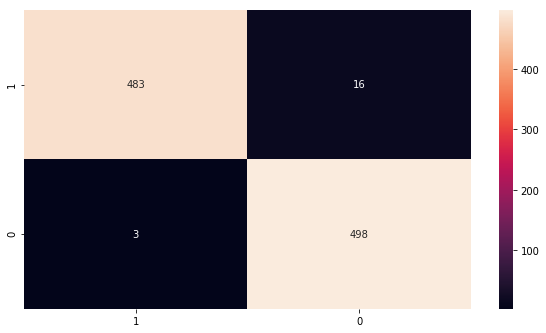

In [55]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = [[483 , 16],
         [  3, 498]]
df_cm = pd.DataFrame(array, index = [i for i in "10"],
                  columns = [i for i in "10"])
plt.figure(figsize = (10,5.5))
sn.heatmap(df_cm, annot=True,fmt="d" )
plt.show()

In [59]:
import pickle
filename = 'modelweb.sav'
pickle.dump(model, open(filename, 'wb'))